In [1]:
import numpy as np
import matplotlib.pyplot as plt

### example

In [ ]:
m=2             # main mode
gamma=0.22          # constant
L_W=1.6             # ratio L / W
epsilon=( 1 / (3*m) ) * (1- ( (L_W*4*gamma)/(3*m) ) )

alpha= 5000.      # Vp solid      [m/s]
rho_s=3000.        # solid density [kg/m^3]

a_magma=2500.            # Vp fluid      [m/s]
rho_f_magma=2400.        # fluid density [kg/m^3]

a_gas=480.            # Vp fluid      [m/s]
rho_f_gas=560.        # fluid density [kg/m^3]

L_d=10000        # CHANGE
f=0.1           # oscillating frequency [Hz]


c_gas = 3 * (a_gas/alpha)**2 * (rho_f_gas/rho_s) * (L_d)
c_magma = 3 * (a_magma/alpha)**2 * (rho_f_magma/rho_s) * (L_d)
print(f'C : {c_gas}\n')
print(f'C : {c_magma}\n')

l_calc_gas = ( m-1 )*a_gas / ( 2 * f * np.sqrt( 1 + 2 * epsilon *c_gas ) )
l_calc_magma = ( m-1 )*a_magma / ( 2 * f * np.sqrt( 1 + 2 * epsilon *c_magma ) )


print(f'length crack calculated gas :   {l_calc_gas:7.7} m')
print(f'length crack calculated magma : {l_calc_magma:7.7} m')

# PLOTS: L vs d

function [fr]=ResFreq(m,L,W,d,rhos,rhof,alfa,a,mode)
% calculate resonance frequencies of a fluid-filled crack according to
% Maeda et al (2017) doi: 10.1093/gji/ggx019
% input parameters are:
% m=mode number
% L = crack Length
% W = crack width
% d = crack thickness
% rhos = density of solid
% rhof = density of fluid
% alfa = acoustic speed in solid
% a = acoustic speed in fluid
% mode = vibration mode ('L' = longitudinal, 'T' = transverse)
mu=(rhos*alfa^2)/3; % rock rigidity (Pa)
b=rhof*a^2; % bulk modulus of the fluid (Pa)
C=(b/mu)*(L/d); % stiffness
gamma=0.22; % constant
% %%%%%%%%%%%%%%%%%%%%%%%%%% eq (54-55)
if mode=='L'
if W/L < 4*gamma/m
eps=(2/(9*m))*sqrt((m*W)/(4*gamma*L));
elseif W/L >= 4*gamma/m & W/L < 1
eps=(1/(3*m))*(1-(4*gamma*L)/(3*m*W));
end
fr=(a*(m-1))/(2*L*sqrt(1+2*eps*C)); % eq. 9
end
if mode=='T'
eps=(W/(3*L*m))*(1-(4*gamma*W)/(3*m*L));
fr=(a*(m-1))/(2*W*sqrt(1+2*eps*C)); % eq. 10

size L (x axis) : 2399
size d (y axis) : 2499


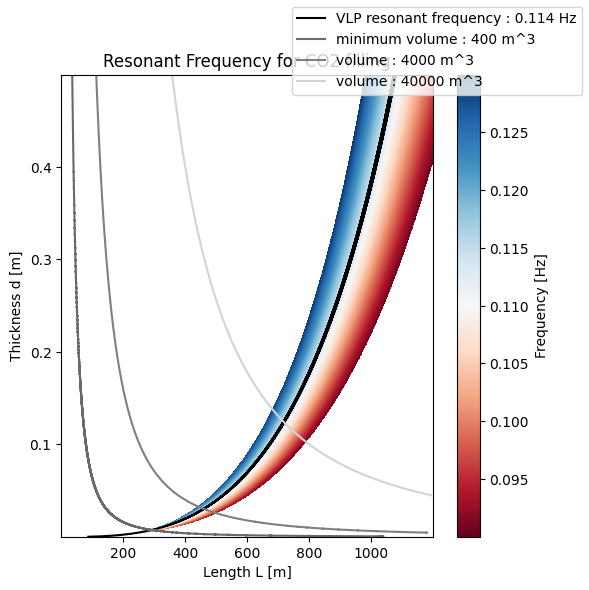

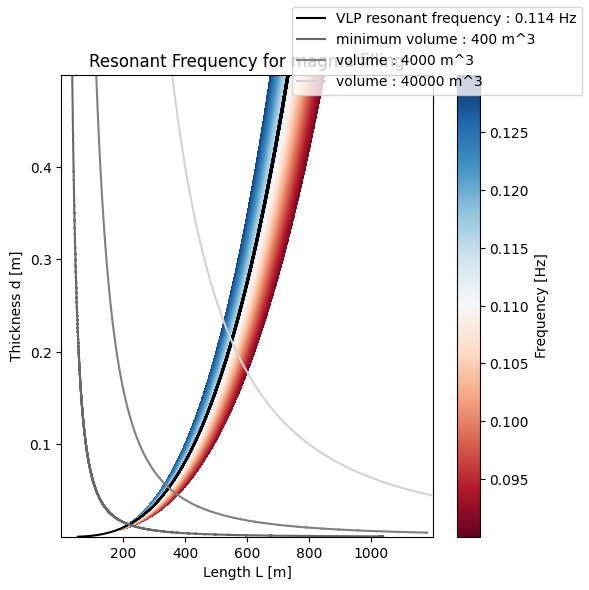

In [289]:
from numpy import ma 
# Parameters
m=2             # main mode
gamma=0.22          # constant
L_W=1.6             # ratio L / W
W_L=1/L_W           # reciprocal 
epsilon=( 1 / (3*m) ) * (1- ( (L_W*4*gamma)/(3*m) ) )

alpha= 5000.      # Vp solid      [m/s]
rho_s=3000.        # solid density [kg/m^3]

a_magma=2500.            # Vp fluid      [m/s]
rho_f_magma=2400.        # fluid density [kg/m^3]

a_co2=480.            # Vp fluid      [m/s]
rho_f_co2=560.        # fluid density [kg/m^3]

############################################
####################### CHANGE######################
############################################
l=np.arange(.5,1200,0.5)                
d=np.arange(0.0002,0.5,0.0002)                
############################################
####################### CHANGE ######################
############################################
print(f'size L (x axis) : {len(l)}')
print(f'size d (y axis) : {len(d)}')

L,D=np.meshgrid(l,d)

c_co2 = 3 * (a_co2/alpha)**2 * (rho_f_co2/rho_s) * (L/D)
c_magma = 3 * (a_magma/alpha)**2 * (rho_f_magma/rho_s) * (L/D)

f_calc_co2 = ( m-1 )*a_co2 / ( 2 * L * np.sqrt( 1 + 2 * epsilon *c_co2 ) )
f_calc_magma = ( m-1 )*a_magma / ( 2 * L * np.sqrt( 1 + 2 * epsilon *c_magma ) )

# Figure parameters
mask_min_value=0.09     # min resonant frequency
mask_max_value=0.13     # max resonant frequency
approx_decimals=3       # rounding frequnecy values
approx_f_value=0.114    # resonance frequency value

VOLUME= L**2 *W_L * D
volume_max=400          # MAX volume change durig resonance [m^3] => min volume of crack
VOLUME_approx=np.round(VOLUME,decimals=-1)

###############
# plot  CO2
###############
# frequency (2D image)
fig, ax = plt.subplots(figsize=(6,6))
mask_co2 = ma.masked_outside(f_calc_co2,mask_min_value,mask_max_value)
img=ax.imshow(mask_co2, interpolation='hanning',cmap=plt.cm.RdBu,origin='lower', extent=[np.min(l),np.max(l),np.min(d),np.max(d)])
ax.set_title(f'Resonant Frequency for CO2 filling')
ax.set_aspect('auto')
ax.set_xlabel('Length L [m]')
ax.set_ylabel('Thickness d [m]')
fig.colorbar(img,label='Frequency [Hz]')

# resonationg frequency curve (0.114 Hz)
f_calc_co2_approx=np.round(f_calc_co2,decimals=approx_decimals)
x,y = np.where(f_calc_co2_approx==approx_f_value)
ax.plot( l[y],d[x],'k',label='VLP resonant frequency : 0.114 Hz')

# minimum volume (400 m^3)
x,y = np.where(VOLUME_approx==volume_max)
ax.plot( l[y],d[x],'dimgrey',label='minimum volume : 400 m^3')
x,y = np.where(VOLUME_approx==volume_max*10)
ax.plot( l[y],d[x],'gray',label='volume : 4000 m^3')
x,y = np.where(VOLUME_approx==volume_max*100)
ax.plot( l[y],d[x],'lightgrey',label='volume : 40000 m^3')
fig.legend()
plt.savefig('../PLOTS/PAPER/SF9/resonant_frequency_CO2.svg')

###############
# plot magma
###############
# frequency (2D image)
fig, ax = plt.subplots(figsize=(6,6))
mask_magma = ma.masked_outside(f_calc_magma,mask_min_value,mask_max_value)
img=ax.imshow(mask_magma, interpolation='hanning',cmap=plt.cm.RdBu,origin='lower', extent=[np.min(l),np.max(l),np.min(d),np.max(d)])
ax.set_title(f'Resonant Frequency for magma filling')
ax.set_aspect('auto')
ax.set_xlabel('Length L [m]')
ax.set_ylabel('Thickness d [m]')
fig.colorbar(img,label='Frequency [Hz]')

# resonationg frequency curve (0.114 Hz)
f_calc_magma_approx=np.round(f_calc_magma,decimals=approx_decimals)
x,y = np.where(f_calc_magma_approx==approx_f_value)
ax.plot( l[y],d[x],'k',label='VLP resonant frequency : 0.114 Hz')
# minimum volume (400 m^3)
x,y = np.where(VOLUME_approx==volume_max)
ax.plot( l[y],d[x],'dimgrey',label='minimum volume : 400 m^3')
x,y = np.where(VOLUME_approx==volume_max*10)
ax.plot( l[y],d[x],'grey',label='volume : 4000 m^3')
x,y = np.where(VOLUME_approx==volume_max*100)
ax.plot( l[y],d[x],'lightgrey',label='volume : 40000 m^3')
fig.legend()
plt.savefig('../PLOTS/PAPER/SF9/resonant_frequency_magma.svg')


### approx: 1 + 2eC ~ 2eC

In [ ]:
m=2             # main mode
gamma=0.22          # constant
L_W=1.6             # ratio L / W
epsilon=( 1 / (3*m) ) * (1- ( (L_W*4*gamma)/(3*m) ) )

rho_s=3000.        # solid density [kg/m^3]
alpha= 5000.      # Vp solid      [m/s]

f=0.1           # oscillating frequency [Hz]

k = rho_s * alpha**2 / ( 4* f**2 *2 * epsilon )

rho_magma=2400.          # fluid density [kg/m^3]
rho_gas=560.            # fluid density [kg/m^3]

k_g= k / rho_gas  

k_m= k / rho_magma  

#print(f'k gas : {k_g}')
#print(f'k magma : {k_m}')

l=300

d_g = l**3 / k_g
d_m = l**3 / k_m

print(f'd gas :   {d_g:7.7} m')
print(f'd magma : {d_m:7.7} m')


### seismic moment 

In [ ]:
Vs_s=2600
m_0 = rho_s * Vs_s**2

moment_g = l**2 * d_g * m_0
#moment_g2 = l**2 / 1.6 * d_g * m_0

moment_m = l**2 * d_m * m_0
#moment_m2 = l**2 / 1.6 * d_m * m_0


print(f'moment gas   : {moment_g / 1e12:7.7}  x10^12')
print(f'moment magma : {moment_m/ 1e12:7.7} x10^12\n')
#print(f'moment gas W=L/1.6   : {moment_g2 / 1e12:7.7}  x10^12')
#print(f'moment magma W=L/1.6 : {moment_m2/ 1e12:7.7} x10^12\n')

print('max moment VLP: moment = 7.822 x10^12')

### maximum vibration volume

In [252]:
L_W=1.6             # ratio L / W

Vs_s=2600
rho_s=3000.        # solid density [kg/m^3]
m_0 = rho_s * Vs_s**2       #shear modulus
seismic_moment=7.822 * 1e12     # MAX VLP seismic moment

vol= seismic_moment / m_0
print(f'Max volume of resonation : !!! {vol:7.7} m^3 !!!\n')

d_extimate=0.001 # [m]          CHANGE

area= vol/d_extimate
print(f'Area of resonator : {area:7.7} m^2 for an extimeted height : {d_extimate:7.7} m')

l_calc_square= np.sqrt(area)
print(f'Length of resonation (if squared) : {l_calc_square:7.7} m')


Max volume of resonation : !!! 385.7002 m^3 !!!

Area of resonator : 385700.2 m^2 for an extimeted height :   0.001 m
Length of resonation (if squared) : 621.0477 m
